##Starting with Exploratory Data Analysis

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
data = pd.read_csv('payu.csv')

In [ ]:
data.head()

,Merchant ID,Transaction ID,Date of Transaction,Settlement Date,Requested Action,Status,Transaction amount,Transaction fee,Payment Type
0,9511450,9410106299,14/07/21 10:03,16/07/21,capture,SUCCESS,300.0,21.24,NB
1,9639200,9406287755,13/07/21 16:46,14/07/21,capture,SUCCESS,2200.0,22.42,NB
2,9682368,8070594039,11/07/21 5:40,13/07/21,capture,SUCCESS,5450.0,22.42,NB
3,9682368,8070598614,11/07/21 13:36,13/07/21,capture,SUCCESS,5450.0,22.42,NB
4,9682368,8070601263,11/07/21 17:54,13/07/21,capture,SUCCESS,2725.0,22.42,NB


##Converting time stamp to Datetime format

In [ ]:
data['Date of Transaction'] = pd.to_datetime(data['Date of Transaction'], format='%d/%m/%y %H:%M').dt.strftime('%Y-%m-%d %H:%M')

In [ ]:
data['Settlement Date'] = pd.to_datetime(data['Settlement Date'], format='%d/%m/%y', errors='coerce').dt.strftime('%Y-%m-%d %H:%M')

In [ ]:
data['Date of Transaction'] = pd.to_datetime(data['Date of Transaction'])

In [ ]:
data['Settlement Date'] = pd.to_datetime(data['Settlement Date'])

In [ ]:
data.head()

,Merchant ID,Transaction ID,Date of Transaction,Settlement Date,Requested Action,Status,Transaction amount,Transaction fee,Payment Type
0,9511450,9410106299,2021-07-14 10:03:00,2021-07-16,capture,SUCCESS,300.0,21.24,NB
1,9639200,9406287755,2021-07-13 16:46:00,2021-07-14,capture,SUCCESS,2200.0,22.42,NB
2,9682368,8070594039,2021-07-11 05:40:00,2021-07-13,capture,SUCCESS,5450.0,22.42,NB
3,9682368,8070598614,2021-07-11 13:36:00,2021-07-13,capture,SUCCESS,5450.0,22.42,NB
4,9682368,8070601263,2021-07-11 17:54:00,2021-07-13,capture,SUCCESS,2725.0,22.42,NB


##Checking for Null values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Merchant ID          35040 non-null  int64         
 1   Transaction ID       35040 non-null  int64         
 2   Date of Transaction  35040 non-null  datetime64[ns]
 3   Settlement Date      29981 non-null  datetime64[ns]
 4   Requested Action     35040 non-null  object        
 5   Status               35040 non-null  object        
 6   Transaction amount   35040 non-null  float64       
 7   Transaction fee      35040 non-null  float64       
 8   Payment Type         35040 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(3)
memory usage: 2.4+ MB


##Calculating time duration in minutes between settlement time and Date of transaction

In [ ]:
time_dur1 = (data['Settlement Date']-data['Date of Transaction']).astype('timedelta64[m]')

In [ ]:
time_dur2 = (data['Settlement Date']-data['Date of Transaction'])#.astype('timedelta64[h]')

In [ ]:
time_dur1.head()

0    2277.0
1     434.0
2    2540.0
3    2064.0
4    1806.0
dtype: float64

In [ ]:
time_dur2.head()

0   1 days 13:57:00
1   0 days 07:14:00
2   1 days 18:20:00
3   1 days 10:24:00
4   1 days 06:06:00
dtype: timedelta64[ns]

#Checking th transactions that happened in less than 24hrs or 1440mins

In [ ]:
req_t = time_dur1 < 1440

In [ ]:
req_t

0        False
1         True
2        False
3        False
4        False
         ...  
35035    False
35036    False
35037    False
35038    False
35039    False
Length: 35040, dtype: bool

In [ ]:
req_t.value_counts()

False    18446
True     16594
dtype: int64

#Finding mean time in minutes

In [ ]:
np.mean(time_dur1)

1217.3757379673793

In [ ]:
avg_time = np.mean(time_dur1)/60
print(avg_time)

20.289595632789656


##Plotting graphs to find peak transaction values using different modes

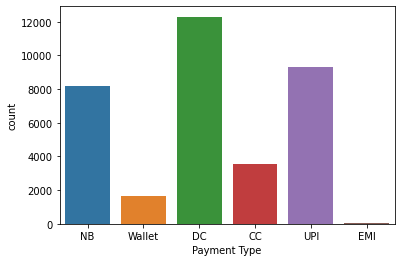

In [ ]:
sns.countplot(data=data, x='Payment Type')

#Payment type with max transaction fee

<BarContainer object of 35040 artists>

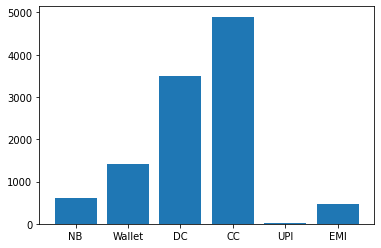

In [ ]:
plt.bar(data['Payment Type'], data['Transaction fee'])

In [ ]:
data['Transaction fee'].max()

4898.62

##Finding day wise sales

In [ ]:
data['Day'] = data['Date of Transaction'].dt.day_name()

In [ ]:
data.head()

,Merchant ID,Transaction ID,Date of Transaction,Settlement Date,Requested Action,Status,Transaction amount,Transaction fee,Payment Type,Day
0,9511450,9410106299,2021-07-14 10:03:00,2021-07-16,capture,SUCCESS,300.0,21.24,NB,Wednesday
1,9639200,9406287755,2021-07-13 16:46:00,2021-07-14,capture,SUCCESS,2200.0,22.42,NB,Tuesday
2,9682368,8070594039,2021-07-11 05:40:00,2021-07-13,capture,SUCCESS,5450.0,22.42,NB,Sunday
3,9682368,8070598614,2021-07-11 13:36:00,2021-07-13,capture,SUCCESS,5450.0,22.42,NB,Sunday
4,9682368,8070601263,2021-07-11 17:54:00,2021-07-13,capture,SUCCESS,2725.0,22.42,NB,Sunday


In [ ]:
data.resample('Data', on='Date_Time').mean()

In [ ]:
data_new = data[['Date of Transaction', 'Transaction amount', 'Day']]

In [ ]:
data_new.head()

,Date of Transaction,Transaction amount,Day
0,2021-07-14 10:03:00,300.0,Wednesday
1,2021-07-13 16:46:00,2200.0,Tuesday
2,2021-07-11 05:40:00,5450.0,Sunday
3,2021-07-11 13:36:00,5450.0,Sunday
4,2021-07-11 17:54:00,2725.0,Sunday


In [ ]:
d2 = pd.DatetimeIndex(data_new['Date of Transaction']).hour

In [ ]:
d2 = pd.Series(data=d2)

In [ ]:
d2 = d2.rename('hours')

In [ ]:
data2 = pd.concat([data_new, d2], axis=1)

In [ ]:
data2.drop('Date of Transaction', inplace=True, axis=1)

In [ ]:
data2.head()

,Transaction amount,Day,hours
0,300.0,Wednesday,10
1,2200.0,Tuesday,16
2,5450.0,Sunday,5
3,5450.0,Sunday,13
4,2725.0,Sunday,17


In [ ]:
data2.to_csv('ques.csv')

##Plotting graph for day-wise sales

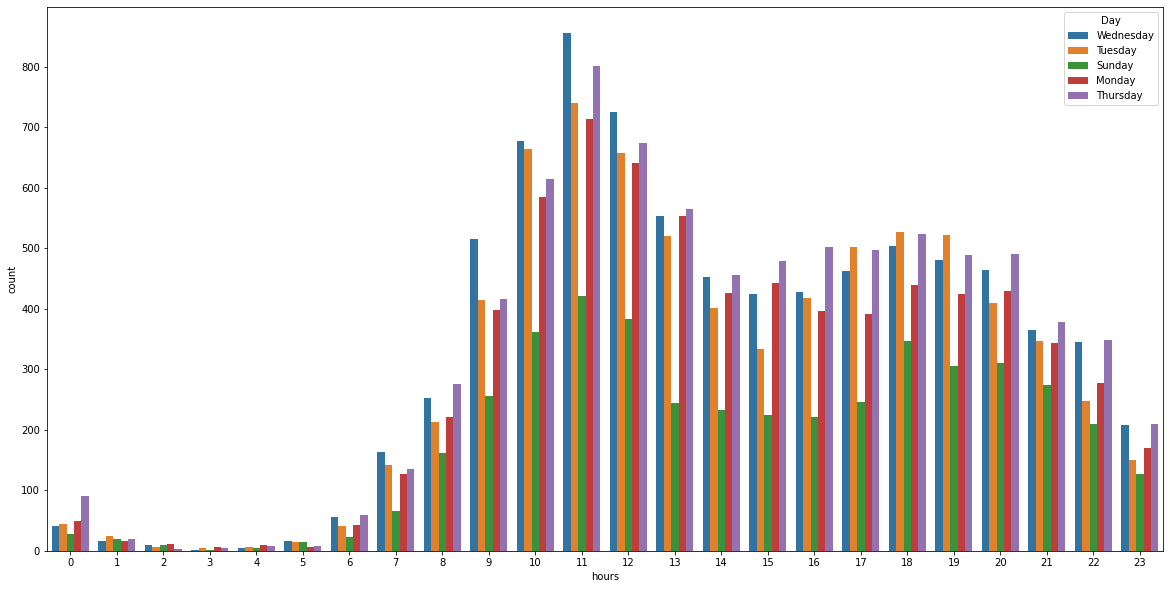

In [ ]:
fig = plt.gcf();
fig.set_size_inches(20, 10);
sns.countplot(data=data2, x='hours', hue='Day');
plt.savefig('foo.png')

In [ ]:
data.head()

,Merchant ID,Transaction ID,Date of Transaction,Settlement Date,Requested Action,Status,Transaction amount,Transaction fee,Payment Type,Day
0,9511450,9410106299,2021-07-14 10:03:00,2021-07-16,capture,SUCCESS,300.0,21.24,NB,Wednesday
1,9639200,9406287755,2021-07-13 16:46:00,2021-07-14,capture,SUCCESS,2200.0,22.42,NB,Tuesday
2,9682368,8070594039,2021-07-11 05:40:00,2021-07-13,capture,SUCCESS,5450.0,22.42,NB,Sunday
3,9682368,8070598614,2021-07-11 13:36:00,2021-07-13,capture,SUCCESS,5450.0,22.42,NB,Sunday
4,9682368,8070601263,2021-07-11 17:54:00,2021-07-13,capture,SUCCESS,2725.0,22.42,NB,Sunday


##Creating table for a specific date

In [ ]:
data3 = data.loc[(data['Date of Transaction'] >= '2021-07-14') & (data['Date of Transaction'] < '2021-07-15')]

In [ ]:
data3

,Merchant ID,Transaction ID,Date of Transaction,Settlement Date,Requested Action,Status,Transaction amount,Transaction fee,Payment Type,Day
0,9511450,9410106299,2021-07-14 10:03:00,2021-07-16,capture,SUCCESS,300.00,21.24,NB,Wednesday
9,9682368,9414639437,2021-07-14 21:19:00,2021-07-15,capture,SUCCESS,5450.00,22.42,NB,Wednesday
14,9511450,9411987561,2021-07-14 14:31:00,2021-07-16,capture,SUCCESS,300.00,21.24,NB,Wednesday
18,9682368,9415171189,2021-07-14 22:51:00,2021-07-15,capture,SUCCESS,5700.00,22.42,NB,Wednesday
19,9709540,9409000767,2021-07-14 00:10:00,NaT,capture,SUCCESS,10000.00,20.06,NB,Wednesday
...,...,...,...,...,...,...,...,...,...,...
34989,14773512,9415339781,2021-07-14 23:30:00,2021-07-15,capture,SUCCESS,13240.00,174.12,CC,Wednesday
34998,14811686,9410316795,2021-07-14 10:35:00,NaT,capture,SUCCESS,3482.18,0.00,DC,Wednesday
35000,14823548,9414789127,2021-07-14 21:44:00,2021-07-15,capture,SUCCESS,7000.00,83.59,DC,Wednesday
35012,14712218,9414548725,2021-07-14 21:04:00,2021-07-15,capture,SUCCESS,7160.00,173.06,Wallet,Wednesday


Plotting graph to find transaction mode used by most on 14th

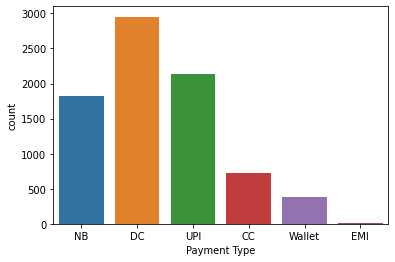

In [ ]:
sns.countplot(data=data3, x='Payment Type');

In [ ]:
column = data3['Transaction amount']
max_value = column. max()

In [ ]:
max_value

177400.0

#Merchant ID having max transaction amount

In [ ]:
data3.loc[data3['Transaction amount']==max_value]

,Merchant ID,Transaction ID,Date of Transaction,Settlement Date,Requested Action,Status,Transaction amount,Transaction fee,Payment Type,Day
14916,11508728,9413382975,2021-07-14 18:14:00,2021-07-16,capture,SUCCESS,177400.0,25.96,NB,Wednesday


In [ ]:
data3.loc[(data['Settlement Date'] < '2021-07-16')]

,Merchant ID,Transaction ID,Date of Transaction,Settlement Date,Requested Action,Status,Transaction amount,Transaction fee,Payment Type,Day
9,9682368,9414639437,2021-07-14 21:19:00,2021-07-15,capture,SUCCESS,5450.0,22.42,NB,Wednesday
18,9682368,9415171189,2021-07-14 22:51:00,2021-07-15,capture,SUCCESS,5700.0,22.42,NB,Wednesday
58,9682368,9410099219,2021-07-14 10:01:00,2021-07-15,capture,SUCCESS,16350.0,22.42,NB,Wednesday
84,9682368,9409759295,2021-07-14 09:02:00,2021-07-15,capture,SUCCESS,5450.0,22.42,NB,Wednesday
85,9682368,9409975159,2021-07-14 09:41:00,2021-07-15,capture,SUCCESS,5450.0,22.42,NB,Wednesday
...,...,...,...,...,...,...,...,...,...,...
34988,14773512,9410708997,2021-07-14 11:27:00,2021-07-15,capture,SUCCESS,21100.0,277.48,CC,Wednesday
34989,14773512,9415339781,2021-07-14 23:30:00,2021-07-15,capture,SUCCESS,13240.0,174.12,CC,Wednesday
35000,14823548,9414789127,2021-07-14 21:44:00,2021-07-15,capture,SUCCESS,7000.0,83.59,DC,Wednesday
35012,14712218,9414548725,2021-07-14 21:04:00,2021-07-15,capture,SUCCESS,7160.0,173.06,Wallet,Wednesday


##Section 2 questions

In [ ]:
data.head()

,Merchant ID,Transaction ID,Date of Transaction,Settlement Date,Requested Action,Status,Transaction amount,Transaction fee,Payment Type,Day
0,9511450,9410106299,2021-07-14 10:03:00,2021-07-16,capture,SUCCESS,300.0,21.24,NB,Wednesday
1,9639200,9406287755,2021-07-13 16:46:00,2021-07-14,capture,SUCCESS,2200.0,22.42,NB,Tuesday
2,9682368,8070594039,2021-07-11 05:40:00,2021-07-13,capture,SUCCESS,5450.0,22.42,NB,Sunday
3,9682368,8070598614,2021-07-11 13:36:00,2021-07-13,capture,SUCCESS,5450.0,22.42,NB,Sunday
4,9682368,8070601263,2021-07-11 17:54:00,2021-07-13,capture,SUCCESS,2725.0,22.42,NB,Sunday


In [ ]:
d3 = data[['Merchant ID', 'Transaction amount']]

In [ ]:
d3

,Merchant ID,Transaction amount
0,9511450,300.0
1,9639200,2200.0
2,9682368,5450.0
3,9682368,5450.0
4,9682368,2725.0
...,...,...
35035,14794168,1700.0
35036,14811686,4050.0
35037,14823548,2000.0
35038,14823548,20000.0


In [ ]:
d4 = d3.groupby('Merchant ID').sum()

In [ ]:
d4

,Transaction amount
Merchant ID,
9511450,155700.0
9605176,57501.0
9632596,73000.0
9639200,156400.0
9645892,7500.0
...,...
14855404,1600.0
14865310,1600.0
14866852,2632.0


In [ ]:
d4['Transaction amount'].nlargest(2)

Merchant ID
12394808    52835725.0
10715830    28749198.0
Name: Transaction amount, dtype: float64

In [ ]:
data

,Merchant ID,Transaction ID,Date of Transaction,Settlement Date,Requested Action,Status,Transaction amount,Transaction fee,Payment Type,Day
0,9511450,9410106299,2021-07-14 10:03:00,2021-07-16,capture,SUCCESS,300.0,21.24,NB,Wednesday
1,9639200,9406287755,2021-07-13 16:46:00,2021-07-14,capture,SUCCESS,2200.0,22.42,NB,Tuesday
2,9682368,8070594039,2021-07-11 05:40:00,2021-07-13,capture,SUCCESS,5450.0,22.42,NB,Sunday
3,9682368,8070598614,2021-07-11 13:36:00,2021-07-13,capture,SUCCESS,5450.0,22.42,NB,Sunday
4,9682368,8070601263,2021-07-11 17:54:00,2021-07-13,capture,SUCCESS,2725.0,22.42,NB,Sunday
...,...,...,...,...,...,...,...,...,...,...
35035,14794168,8070658263,2021-07-11 17:10:00,2021-07-13,capture,SUCCESS,1700.0,0.00,DC,Sunday
35036,14811686,8070661171,2021-07-11 20:36:00,NaT,capture,SUCCESS,4050.0,0.00,DC,Sunday
35037,14823548,8070652765,2021-07-11 10:38:00,2021-07-13,capture,SUCCESS,2000.0,0.00,DC,Sunday
35038,14823548,8070652926,2021-07-11 10:46:00,2021-07-13,capture,SUCCESS,20000.0,0.00,DC,Sunday


In [ ]:
data5 = data[['Merchant ID', 'Date of Transaction', 'Transaction amount']]

In [ ]:
data5.head()

,Merchant ID,Date of Transaction,Transaction amount
0,9511450,2021-07-14 10:03:00,300.0
1,9639200,2021-07-13 16:46:00,2200.0
2,9682368,2021-07-11 05:40:00,5450.0
3,9682368,2021-07-11 13:36:00,5450.0
4,9682368,2021-07-11 17:54:00,2725.0


In [ ]:
d5 = data5.sort_values('Merchant ID')

In [ ]:
d6=d5.set_index('Merchant ID')

In [ ]:
d6.to_csv('ques2.csv')